<a href="https://colab.research.google.com/github/losvaldote/Python_Club_for_Physicist/blob/main/Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 1 v1**
# **Luis Osvaldo Téllez Tovar**

## a) Definir y utilizar tres métodos.


In [ ]:
# Vamos a importar la biblioteca numpy.
import numpy as np

**Método de bisección.**

La ecuación que queremos resolver es $$f(E) = 1 + 0.0167\sin(E) - E = 0.$$

Para aplicar el método de bisección necesitamos conocer un intervalo $[a,b]$ tal que se cumpla $f(a)f(b)< 0$.

Para hallar dicho intervalo consideremos, como primer aproximación, el primer término en la expansión en serie del $\sin(E)$. Esto es 
\begin{eqnarray}
    f(E) &=& 1 + 0.0167E - E\\
         &=& 1 + (0.0167-1)E\\
         &=& 1 -  0.9833E
\end{eqnarray}
Igualamos la expresión anterior con cero y resolvemos para $E$
\begin{eqnarray}
    1 -  0.9833E &=& 0\\
    0.9833E &=& 1\\
    E&=&\frac{1}{0.9833}\\
    E&=&1.01
\end{eqnarray}

Con lo anterior proponemos el intervalo $[-3,3]$. Veamos 
\begin{eqnarray}
    f(-3) &=& 1 + 0.0167\sin(-3) - (-3)\\
          &\approx& 3.99,\\
    f(3) &=& 1 + 0.0167\sin(3) - (3)\\
         &\approx& -1.99.
\end{eqnarray}
Se cumple la condición $f(a=-3)f(b=3)< 0$, por lo tanto podemos usar este intervalo para aplicar el método de bisección.


In [ ]:
# Definamos el algoritmo del metodo de biseccion.
# f   - funcion de la cual queremos hallar su raiz.
# a   - limite inferior del intervalo en el que se buscara la solucion.
# b   - limite superior del intervalo en el que se buscara la solucion.
# tol - tolerancia o error.
def biseccion(f, a, b, tol):
    
    if a > b:
        raise ValueError("Intervalo mal definido.")
    if tol <= 0:
        raise ValueError("La cota de error debe ser un número positivo.")
        
    x = (a + b) / 2.0
    i=1
    while True: # Este va a funcionar mientras el if sea cierto.
        if b - a < tol:
            i+=1
            return(x,i)
        # Utilizamos la función signo para evitar errores de precision.
        elif np.sign(f(a)) * np.sign(f(x)) > 0: 
            i+=1 # para el contador.
            a = x
        else:
            i+=1
            b = x
        x = (a + b) / 2.0
    return(x,i)


In [ ]:
# Definamos la funcion.
def f_E(x):
  return(1 + 0.0167*np.sin(x) - x)

In [ ]:
# Resolvamos la ecuacion.
a = -3.0
b = 3.0
tol = 1.0e-8

sol1 = biseccion(f_E,a,b,tol)

# Imprimamos la solucion.
print("La solucion por el método de bisección es E = ", sol1[0])

La solucion por el método de bisección es E =  1.0141790891066194


**Método de Newton.**

Para poder aplicar el método de Newton necesitamos conocer la derivada de la función. Esta es
$$f'(E) = 0.0167\cos(E) -1.$$

También necesitamos un valor de prueba $E_0$ en el que $f(E_0)$ no sea muy grande. Por simplicidad y puesto que, por el método de bisección, ya conocemos la raíz de la función proponemos $E_0 = 1$.

In [ ]:
# Definamos el algoritmo del metodo de Newton.
# f       - funcion de la cual queremos hallar su raiz.
# df      - derivada de la funcion.
# x_0     - valor de prueba.
# maxiter - numero de iteraciones.
# xtol    - tolerancia en x.
# ftol    - tolerancia en la funcion.

def newton(f, df, x_0, maxiter, xtol, ftol):  
    x = float(x_0)
    for i in range(maxiter):
        dx = -f(x) / df(x) # ¡Aquí se puede producir una división por cero!
        # También x puede haber quedado fuera del dominio.
        x = x + dx
        if abs(dx / x) < xtol and abs(f(x)) < ftol:
            return x

In [ ]:
# Definamos la derivada de la funcion.
def df_E(x):
  return(0.0167*np.cos(x) - 1)

In [ ]:
# Resolvamos la ecuacion.
E_0 = 1.0
maxiter = 50
x_tol = 1.0e-6
f_tol = 1.0e-6

sol2 = newton(f_E, df_E, E_0, maxiter, x_tol, f_tol)

print("La solucion por el método de Newton es E = ", sol2)

La solucion por el método de Newton es E =  1.0141790871647136


**Método de la Secante.**

Para este método no necesitamos conocer la derivada de la función. Sin embargo, necesitamos dos puntos del dominio de esta. Aunque ya conocemos el valor de la raíz, elijamos un primer valor de prueba un poco más alejado. Por ejemplo $E_1=0$ y $E_2=5.$ 

In [ ]:
# Definamos el algoritmo del metodo de la Secante.
# f   - funcion de la cual queremos hallar su raiz.
# x0  - punto 1 del dominio de la funcion.
# x1  - punto 2 del dominio de la funcion.
# eps - tolerancia.

def sec(f, x0, x1, eps): 
    import sys # biblioteca para poder usar el exit().
    global x   # variable global arbitraria.
    f_x0 = f(x0)
    f_x1 = f(x1)
    iteration_counter = 0 # variable auxiliar para while.

    while abs(f_x1) > eps and iteration_counter < 50:
        try:
            denominator = float(f_x1 - f_x0)/(x1 - x0)
            x = x1 - float(f_x1)/denominator
        except ZeroDivisionError:    # condicion para no dividir entre cero.
            print("Error! - 0 en el denominador para x = ", x)
            sys.exit(1)     # Abort with error sale del ciclo (equiv C++ break)
        x0 = x1
        x1 = x
        f_x0 = f_x1
        f_x1 = f(x1)
        iteration_counter += 1


    if abs(f_x1) > eps:
        iteration_counter = -1 # referencial
    return x, iteration_counter

In [ ]:
# Resolvamos la ecuacion.
# La funcion ya ha sido definida como f_E
E_1 = 0.0
E_2 = 5.0
# Reutilizaremos la tolerancia definida arriba como
# tol = 1.0e-8

sol3 = sec(f_E, E_1, E_2, tol)

print("La solucion por el método de la Secante es E = ", sol3[0])

La solucion por el método de la Secante es E =  1.0141790871646423


In [ ]:
# Imprimamos los tres resultados juntos.
print("La raíz hallada por cada método es:")
print("Bisección -> ", sol1[0])
print("Newton    -> ", sol2)
print("Secante   -> ", sol3[0])

La raíz hallada por cada método es:
Bisección ->  1.0141790891066194
Newton    ->  1.0141790871647136
Secante   ->  1.0141790871646423


## **Gráfica.**

In [ ]:
# Vamos a importar la biblioteca para graficar.
import matplotlib.pyplot as plt

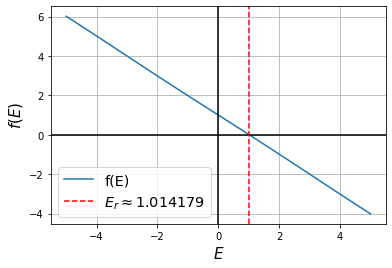

In [ ]:
# Generemos el dominio de la funcion.
x_i = np.linspace(-5.0, 5.0, 100)
# Generemos la funcion en el dominio x_i.
f_i = f_E(x_i)

# Hagamos la grafica.
plt.plot(x_i, f_i, label='f(E)') 
plt.axvline(0, color='k')     # eje y.
plt.axhline(0, color='k')     # eje x.
plt.axvline(1.014179, color='r', linestyle="--", label='$E_r \\approx 1.014179$' ) # raiz de la funcion.

plt.ylabel('$f(E)$', fontsize=15)
plt.xlabel('$E$', fontsize=15 )

plt.legend(loc = 'best', fontsize = 'x-large')
plt.grid()
plt.show()

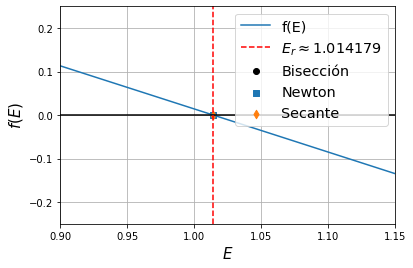

In [ ]:
# Grafiquemos las tres raices obtenidas por los distintos metodos.
# Hagamos un zoom a la grafica anterior.

# Hagamos la grafica.
plt.plot(x_i, f_i, label='f(E)') 
plt.axvline(0, color='k')     # eje y.
plt.axhline(0, color='k')     # eje x.
plt.axvline(1.014179, color='r', linestyle="--", label='$E_r \\approx 1.014179$' ) # raiz de la funcion.

plt.scatter(sol1[0],f_E(sol1[0]), c='k', label='Bisección')
plt.scatter(sol2,f_E(sol2), marker='s',  label='Newton')
plt.scatter(sol3[0],f_E(sol3[0]), marker='d', label='Secante')

plt.ylabel('$f(E)$', fontsize=15)
plt.xlabel('$E$', fontsize=15 )

plt.xlim(0.9,1.15)
plt.ylim(-0.25,0.25)

plt.legend(loc = 'best', fontsize = 'x-large')
plt.grid()
plt.show()

## b)


Para este inciso consideramos una función general (distinta a la anterior) pues $M$ no es necesariamente igual que 1 ya que ahora depende del tiempo y otros parámetros de la forma
$$M=\frac{2\pi (t-t_0)}{P}.$$

La nueva función es 
$$f(E) = M + 0.0167\sin(E) - E,$$
donde tomamos la excentricidad como $e = 0.0167$ (la de la Tierra) pues el problema no dice que debamos cambiarla.

Queremos hallar $E$, es decir, queremos resolver la ecuación
$$f(E) = M + 0.0167\sin(E) - E = 0,$$
pero necesitamos conocer los valores de $M$. Sabemos que $t_0 = 0$ y $t = 100$ días, mientras que el periodo está dado por 
$$P=\frac{2\pi a^{3/2}}{(G(M_\star+m))^{1/2}}.$$

En el caso del planeta Tierra, sabemos que el periodo es de $P = 365$ días $ = 3.154\times7 s$ pues es el tiempo que tarda en darle la vuelta al Sol. Calculémoslo por completez:

In [ ]:
a = 1.496e11  # Unidad astronomica en metros (m).
G = 6.674e-11 # Constante de Gravitacion Universal en m^3/(kg*s^2), con s como segundos.
M = 1.989e30  # Masa del Sol en kilogramos (kg).
m = 5.972e24  # Masa de la Tierra en kg.

Periodo = (2.*np.pi*pow(a,3/2))/np.sqrt(G*(M+m))
print("El periodo es ", format(Periodo,'.3E'), "s")

El periodo es  3.155E+07 s


Este resultado coincide con lo mencionado anteriormente. Sin embargo, como el tiempo está dado en días, por simplicidad usaremos $P = 365$ días. 




In [ ]:
# Periodo en dias.
P = 365.0

Ahora sí podemos calcular $M$.

Primero definamos el arreglo que contendrá nuestro "tiempo" desde cero hasta 100 días uniformemente distribuido por día. Esto es:


In [ ]:
t_i = np.linspace(0.0, 100.0, 100)

Definamos la función "M_t" para calcular $M$ en función del tiempo:

In [ ]:
def M_t(t):
  return((2*np.pi*(t))/P)

# Como t_0 = 0 no lo ponemos.

In [ ]:
M_i = M_t(t_i)

Ahora, definamos la función de la que queremos obtener la raíz. Esta dependerá de dos parámetros: $M$ y $E$.

In [ ]:
def f_gral(M,x):
  return(M + 0.0167*np.sin(x) - x)

En principio, estamos listos para hallar la raíz de nuestra función. Para esto, usaremos el **método de la secante**. Sin embargo, debemos tomar en cuenta que en el algoritmo definido en celdas arriba solo consideramos funciones que dependen de un único parámetro. Ahora, nuestra nueva función depende de dos parámetros. Para esto, modificaremos el algoritmo de la siguiente forma:

In [ ]:
# Re definamos el algoritmo del metodo de la Secante.
# f   - funcion de la cual queremos hallar su raiz.
# M   - parámetro de la funcion.
# x0  - punto 1 del dominio de la funcion.
# x1  - punto 2 del dominio de la funcion.
# eps - tolerancia.

def sec2(f, M, x0, x1, eps): 
    import sys # biblioteca para poder usar el exit().
    global x   # variable global arbitraria.
    f_x0 = f(M,x0) # Aqui pasamos los parametros que necesita la funcion.
    f_x1 = f(M,x1)
    iteration_counter = 0 # variable auxiliar para while.

    while abs(f_x1) > eps and iteration_counter < 50:
        try:
            denominator = float(f_x1 - f_x0)/(x1 - x0)
            x = x1 - float(f_x1)/denominator
        except ZeroDivisionError:    # condicion para no dividir entre cero.
            print("Error! - 0 en el denominador para x = ", x)
            sys.exit(1)     # Abort with error sale del ciclo (equiv C++ break)
        x0 = x1
        x1 = x
        f_x0 = f_x1
        f_x1 = f(M,x1)
        iteration_counter += 1


    if abs(f_x1) > eps:
        iteration_counter = -1 # referencial
    #return x, iteration_counter
    return x

Para ver que nuestra modificación funciona, resolvamos el caso para $M=1$.

In [ ]:
prueba1 = sec2(f_gral, 1.0, 0.0, 5.0, 1.0e-8)

print("La raiz para el caso M=1 de la función general es:", prueba1)
print("La raiz para la primer función es:                ", sol3[0])

La raiz para el caso M=1 de la función general es: 1.0141790871646423
La raiz para la primer función es:                 1.0141790871646423


Vemos que ambas soluciones son iguales. Por lo tanto nuestra modificación al algoritmo sí funciona. Ahora sí, resolvamos la ecuación. Implementaremos un ciclo for para resolver la ecuación con los distintos valores de $M$ que obtuvimos a lo largo de los 100 días.

In [ ]:
solu = np.zeros(len(M_i)) # Arreglo que guardara las soluciones.
j = 0 # Iniciamos en cero el contador del for.
for i in M_i:
  solu[j] = sec2(f_gral, M_i[j],M_i[j] , M_i[j]+100, 1.0e-8) # Llamamos al metodo de la secante.
  j += 1

Como sabemos, el **método de la secante** requiere de dos puntos. Si revisamos la celda anterior veremos que dichos puntos son M_i[j], es decir, el j-ésimo valor de M y este valor más cien. Hemos elegido estos puntos porque, cuando la excentricidad es pequeña (como en este caso), las cantidades $M$ y $E$ no son muy diferentes.

Al comparar las raíces obtenidas con los valores de $M$ podemos hacer una comprobación visual rápida de que nuestro método funciona, como puede hacerse en las siguientes tres celdas.

In [ ]:
solu

array([0.        , 0.01768338, 0.03536667, 0.05304978, 0.0707326 ,
       0.08841504, 0.10609702, 0.12377844, 0.1414592 , 0.15913921,
       0.17681838, 0.19449661, 0.21217382, 0.22984992, 0.2475248 ,
       0.26519839, 0.28287059, 0.30054131, 0.31821045, 0.33587795,
       0.35354369, 0.37120761, 0.3888696 , 0.40652959, 0.42418749,
       0.44184321, 0.45949667, 0.47714779, 0.49479648, 0.51244267,
       0.53008627, 0.5477272 , 0.56536539, 0.58300075, 0.60063322,
       0.61826271, 0.63588915, 0.65351247, 0.6711326 , 0.68874946,
       0.70636298, 0.72397309, 0.74157974, 0.75918284, 0.77678234,
       0.79437817, 0.81197027, 0.82955858, 0.84714303, 0.86472357,
       0.88230014, 0.89987268, 0.91744115, 0.93500548, 0.95256563,
       0.97012153, 0.98767316, 1.00522045, 1.02276336, 1.04030185,
       1.05783587, 1.07536538, 1.09289034, 1.11041071, 1.12792646,
       1.14543754, 1.16294393, 1.1804456 , 1.1979425 , 1.21543461,
       1.23292191, 1.25040436, 1.26788195, 1.28535464, 1.30282

In [ ]:
M_i

array([0.        , 0.01738809, 0.03477617, 0.05216426, 0.06955235,
       0.08694044, 0.10432852, 0.12171661, 0.1391047 , 0.15649278,
       0.17388087, 0.19126896, 0.20865705, 0.22604513, 0.24343322,
       0.26082131, 0.2782094 , 0.29559748, 0.31298557, 0.33037366,
       0.34776174, 0.36514983, 0.38253792, 0.39992601, 0.41731409,
       0.43470218, 0.45209027, 0.46947835, 0.48686644, 0.50425453,
       0.52164262, 0.5390307 , 0.55641879, 0.57380688, 0.59119496,
       0.60858305, 0.62597114, 0.64335923, 0.66074731, 0.6781354 ,
       0.69552349, 0.71291157, 0.73029966, 0.74768775, 0.76507584,
       0.78246392, 0.79985201, 0.8172401 , 0.83462819, 0.85201627,
       0.86940436, 0.88679245, 0.90418053, 0.92156862, 0.93895671,
       0.9563448 , 0.97373288, 0.99112097, 1.00850906, 1.02589714,
       1.04328523, 1.06067332, 1.07806141, 1.09544949, 1.11283758,
       1.13022567, 1.14761375, 1.16500184, 1.18238993, 1.19977802,
       1.2171661 , 1.23455419, 1.25194228, 1.26933037, 1.28671

In [ ]:
abs(M_i-solu)

array([0.        , 0.0002953 , 0.0005905 , 0.00088552, 0.00118025,
       0.00147461, 0.0017685 , 0.00206183, 0.0023545 , 0.00264642,
       0.0029375 , 0.00322765, 0.00351678, 0.00380478, 0.00409158,
       0.00437708, 0.00466119, 0.00494382, 0.00522488, 0.00550429,
       0.00578195, 0.00605778, 0.00633168, 0.00660358, 0.00687339,
       0.00714103, 0.0074064 , 0.00766943, 0.00793004, 0.00818814,
       0.00844365, 0.0086965 , 0.0089466 , 0.00919388, 0.00943826,
       0.00967966, 0.00991801, 0.01015325, 0.01038528, 0.01061406,
       0.01083949, 0.01106152, 0.01128008, 0.01149509, 0.0117065 ,
       0.01191425, 0.01211826, 0.01231848, 0.01251484, 0.0127073 ,
       0.01289578, 0.01308024, 0.01326062, 0.01343686, 0.01360892,
       0.01377674, 0.01394027, 0.01409948, 0.0142543 , 0.0144047 ,
       0.01455063, 0.01469206, 0.01482893, 0.01496122, 0.01508888,
       0.01521188, 0.01533018, 0.01544375, 0.01555257, 0.0156566 ,
       0.01575581, 0.01585017, 0.01593967, 0.01602427, 0.01610

Ahora grafiquemos $E(t)$:

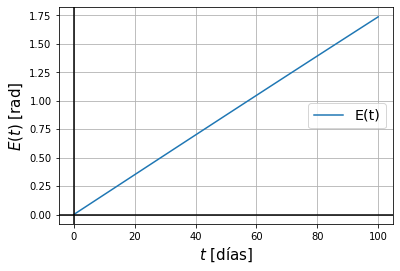

In [ ]:
# Hagamos la grafica.
plt.plot(t_i, solu, label='E(t)') 
plt.axvline(0, color='k')     # eje y.
plt.axhline(0, color='k')     # eje x.

plt.ylabel('$E(t)$ [rad]', fontsize=15)
plt.xlabel('$t$ [días]', fontsize=15 )

plt.legend(loc = 'best', fontsize = 'x-large')
plt.grid()
plt.show()

Como hemos dicho que, en nuestro caso, $M$ y $E$ toman valores similares, y que $M$ depende linealmente del tiempo, tiene sentido que $E$ tenga un comportamiento lineal.

Ahora graficaremos $x(t)$ e $y(t)$, donde 
$$x=a\cos(E-e),$$
$$y=a\sqrt{1-e^2}\sin(E).$$


In [ ]:
# Definamos las funciones para x e y.

def x_E(x,y,z):
  return(x*np.cos(y-z))

def y_E(x,y,z):
  return(x*np.sqrt(1-z**2)*np.sin(y))

In [ ]:
x_i = x_E(1.0, solu, 0.0167)
y_i = y_E(1.0, solu, 0.0167)

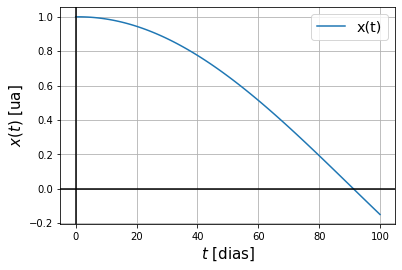

In [ ]:
# Hagamos la grafica de x.
plt.plot(t_i, x_i, label='x(t)') 
plt.axvline(0, color='k')     # eje y.
plt.axhline(0, color='k')     # eje x.

plt.ylabel('$x(t)$ [ua]', fontsize=15)
plt.xlabel('$t$ [dias]', fontsize=15 )

plt.legend(loc = 'best', fontsize = 'x-large')
plt.grid()
plt.show()

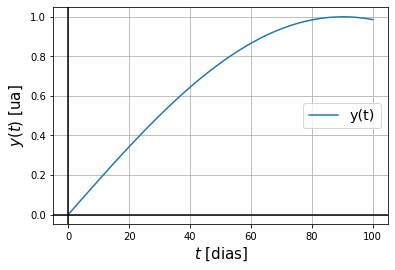

In [ ]:
# Hagamos la grafica de y.
plt.plot(t_i, y_i, label='y(t)') 
plt.axvline(0, color='k')     # eje y.
plt.axhline(0, color='k')     # eje x.

plt.ylabel('$y(t)$ [ua]', fontsize=15)
plt.xlabel('$t$ [dias]', fontsize=15 )

plt.legend(loc = 'best', fontsize = 'x-large')
plt.grid()
plt.show()

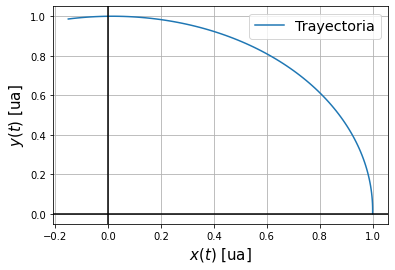

In [ ]:
# Hagamos la grafica de x con y.
plt.plot(x_i, y_i, label='Trayectoria') 
plt.axvline(0, color='k')     # eje y.
plt.axhline(0, color='k')     # eje x.

plt.ylabel('$y(t)$ [ua]', fontsize=15)
plt.xlabel('$x(t)$ [ua]', fontsize=15 )

plt.legend(loc = 'best', fontsize = 'x-large')
plt.grid()
plt.show()

En esta última celda hemos graficado $x(t)$ con $y(t)$ en unidades astronómicas. Vemos que esto corresponde a la trayectoria que describiría la Tierra alrededor del Sol en 100 días. Como es de esperarse, pues $e = 0.0167$, la trayectoria es una elipse.